# Kernel Regression

Another approach to fit a non-linear data generating function while still remaining linear w.r.t. the weights is the Kernel Regression. A Kernel is a function of the input data  $\Phi(x)_j$.<br> In this example we are using the Gaussian kernel which has the following form: ${\Phi(x)_j} = e^{\frac{-|x-\mu_j|^2}{2\sigma}}$.
A key difference between e.g. polynomial regresssion and kernel regression is that there are additional parameters $\mu_j$ and $\sigma$. <br>

Since regression only optimizes w.r.t. the weights, we need to decide the value of $\mu_j$ and $\sigma$ in advance. Note that $\sigma$ does not have a subscript which indicates, that every kernel has the same variance. Furthermore it is our decision how many kernels we want to use to approximate the data generation function. One approch is to simply place a kernel on every value of $x$. But then there is still to decide what value $\sigma$ takes. In fact it is really hard to determine. Later in this notebook the impact of different values for $\sigma$ are shown to give some criteria on how to choose them.

In [ ]:
# Importing all libaries needed
import sklearn.datasets as dset
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Setting up the parameter of the model
param_dict = {
    'num_data_samples': 20,
    'noise': 1000,
    'learning_rate': 1e-2,
    'num_epochs': 1500,
    'num_features': 4
}

In [3]:
x,y = dset.make_regression(n_samples=param_dict['num_data_samples'], n_features=1, noise=param_dict['noise'])
y /= 500  # Scaling y 

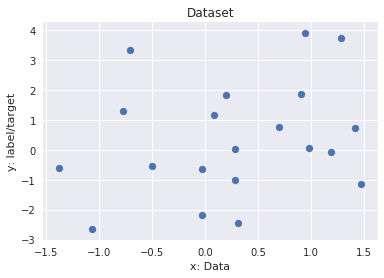

In [4]:
# Visualizing the dataset
plt.scatter(x[:,0],y)
plt.xlabel('x: Data')
plt.ylabel('y: label/target')
plt.title("Dataset")
plt.show()

In [5]:
# Gaussian radial basis function
def gaussian_kernel(x, mu, sigma):
    return np.exp(-np.square(x-mu)/(2*np.sqrt(sigma)))

In [7]:
mu = x
kernels ={}
kernels['x_0'] = np.ones(x.size)[:,None]
for i in range(x.size):
    kernels['x_{}'.format(i+1)] = gaussian_kernel(x, x[i], 0.00002) 

x_rbf=np.hstack((kernels.values()))

In [8]:
w = 0.1 * np.ones(x_rbf.shape[1])
w = w[:,None]
w.shape

(21, 1)

In [9]:
# Mean Squared Error Loss
def MSE_loss(x,w,y):
    y_pred = np.dot(x,w).reshape(-1,) # Linear transformation
    loss = 0.5 * np.sum(np.square(y_pred-y), axis=0) 
    return loss

# Stochstic Gradient Descent
def optimzer(x,w,y):
    y_pred = np.dot(x,w).reshape(-1,) 
    dW = np.sum((y_pred - y)[:,None]*x , axis=0)
    w -= learning_rate*dW[:,None]
    return w

In [10]:
learning_rate = param_dict['learning_rate']
loss_list = []
# Training the model:
for i in range(param_dict['num_epochs']):
    loss = MSE_loss(x_rbf,w,y)
    loss_list.append(loss)
    w = optimzer(x_rbf,w,y)

In [11]:
x_plot = np.linspace(-2,2,100)
def kernel_regression_plot(x, w, mu):
    y = w[0] * np.ones(x.shape[0])
    
    M = w.shape[0]-1
    for i in range(M):
        y += w[i+1] * gaussian_kernel(x, mu[i], 0.00002)
        
    return y
        
    

In [12]:
y_plot = kernel_regression_plot(x_plot, w, mu)

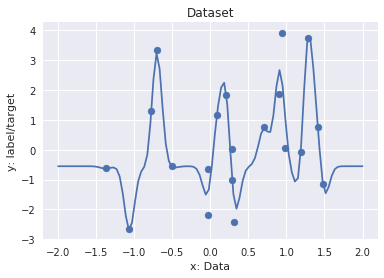

In [13]:
# Visualizing the dataset
plt.scatter(x,y)
plt.plot(x_plot,y_plot)
plt.xlabel('x: Data')
plt.ylabel('y: label/target')
plt.title("Dataset")
plt.show()

In [14]:
loss_list[-1]

3.908765606590522

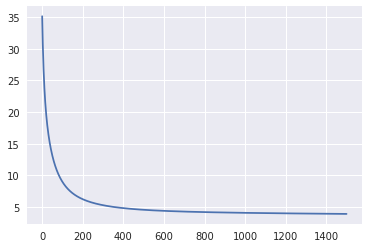

In [15]:
plt.plot(range(len(loss_list)),loss_list)
